# matplotlibを利用したデータ可視化の基礎技法

*matplotlib gallery: 
https://matplotlib.org/gallery.html


In [1]:
# matplotlibをインポート

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

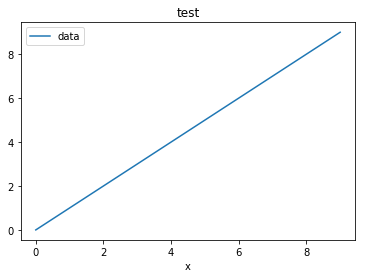

In [2]:
# 試しにプロットします

data = np.arange(10)

# plt.figure() -> 明示的に宣言する必要はない
plt.figure(figsize=[6,4])
plt.plot(data)             # プロット
plt.xlabel('x')            # x軸ラベル
plt.title('test')          # タイトル
plt.legend(['data'])       # レジェンド。plt.legend('data')ではないことに留意
plt.show()

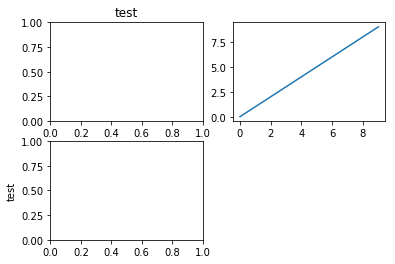

In [3]:
# サブプロット

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.set_title('test')
ax2.plot(data)
ax3.set_ylabel('test')
plt.show()

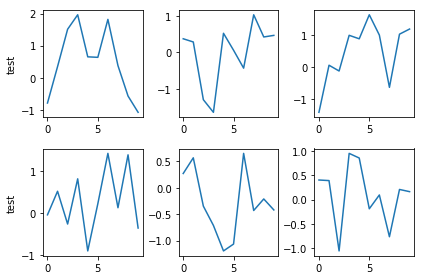

In [4]:
# ループを利用したサブプロットの作成

fig, axes = plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        axes[i,j].plot(np.random.randn(10))
        if j==0:
            axes[i,j].set_ylabel('test') # 左端のfigureにのみy軸ラベルを付ける
            
plt.tight_layout() # 軸ラベルとfigureが重なるのを防ぐ
plt.show()

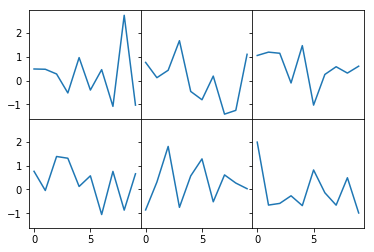

In [5]:
# プロット間のスペースの調整

fig, axes = plt.subplots(2,3,sharex=True,sharey=True)
for i in range(2):
    for j in range(3):
        axes[i,j].plot(np.random.randn(10))
        
plt.subplots_adjust(wspace=0,hspace=0)

# save figure
plt.savefig('test') 

## pima indiansデータを用いた様々な可視化

In [6]:
# データの取り込み

import pandas as pd

# Jupyter Notebookのホームディレクトリに下記csvファイルを格納してください
filename = "pima-indians-diabetes.data.csv"

df = pd.read_csv(filename, sep=',',
                 names=[
                     'Pregnancies',
                     'Glucose',
                     'Blood Pressure',
                     'Skin Thickness',
                     'Insulin',
                     'BMI',
                     'Diabetes Pedigree Function',
                     'Age',
                     'Outcome'
                 ]
                )

In [7]:
# 読み込んだデータの確認
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# 平均値による欠損値の補完 (e-learningの復習)

imputer_cols = df.columns[[1,2,3,4,5,6]]
correct_df = df.copy()

for i in imputer_cols:
    correct_df[i] = correct_df[i].mask(df[i]==0, df[i].mean())

correct_df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## ヒストグラムによる可視化

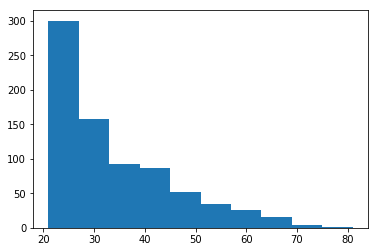

In [9]:
# ageデータを使用
data_age = correct_df['Age']

# pyplot.hist関数を使用
plt.hist(data_age)
plt.show()

In [10]:
# ヘルプの参照
?plt.hist

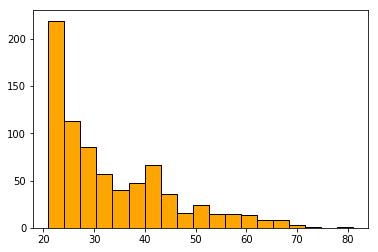

In [11]:
# ビジュアルの調整

bins = np.linspace(21,81,20)

plt.hist(data_age,
         bins=bins,         # bin widthの調整
         color='orange',    # 色の調整
         edgecolor='black'  # 枠線の調整
        ) 
plt.show()

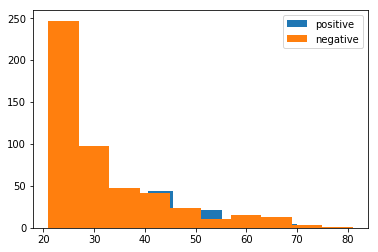

In [12]:
# outcome毎のヒストグラム

df_pos = correct_df[correct_df['Outcome']==1]
df_neg = correct_df[correct_df['Outcome']==0]

# 重ねて表示
plt.hist(df_pos['Age'])
plt.hist(df_neg['Age'])
plt.legend(['positive','negative'])
plt.show()

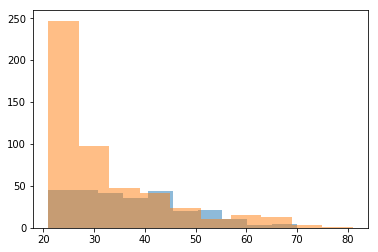

In [13]:
plt.hist(df_pos['Age'],alpha=0.5)
plt.hist(df_neg['Age'],alpha=0.5)
plt.show()

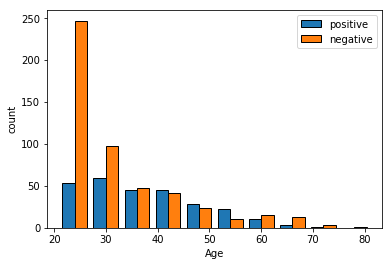

In [14]:
# 並べて表示

def plot_histogram(ax,df_pos,df_neg,col='Age',le=False,ti=False):
    ax.hist([df_pos[col], df_neg[col]],edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('count')
    if le:
        ax.legend(['positive','negative'])
    if ti:
        s = 'Histogram of ' + col + ' data'
        ax.set_title(s)

fig, ax = plt.subplots(1,1)
plot_histogram(ax,df_pos,df_neg,le=True)
plt.show()

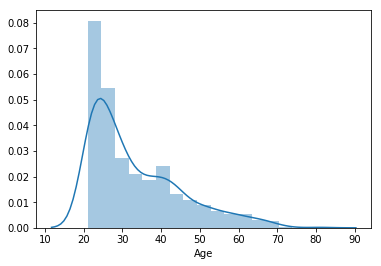

In [15]:
# 分布曲線による可視化
# seabornを使用すると楽に描けるので、ここではseabornを使用します

import seaborn as sns
sns.distplot(data_age)
plt.show()

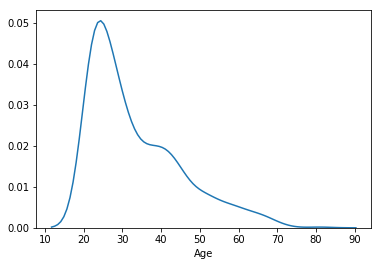

In [16]:
# 曲線だけを得たい場合には、hist=Falseとするか、"kdeplot" 関数を使用します
sns.distplot(data_age, hist=False)
plt.show()

## 円グラフによる可視化

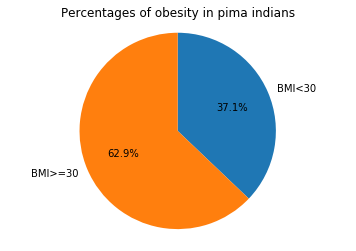

In [17]:
# BMIデータを使用

data_BMI = correct_df['BMI']
normal = len(data_BMI[data_BMI<30])
obesity = len(data_BMI[data_BMI>=30])

plt.pie([normal,obesity],
        labels=['BMI<30','BMI>=30'], # ラベルの指定
        startangle=90,               # 開始点を12時の方向に合わせる
        counterclock=False,         # なぜかdefaultではTrueになっている
        autopct="%1.1f%%",
       )
plt.title('Percentages of obesity in pima indians')

# 円グラフがつぶれるのを防ぐ
plt.axis('equal')

plt.show()

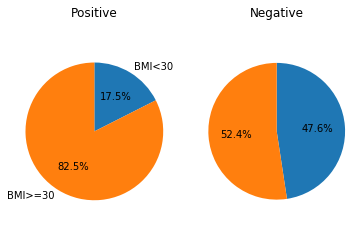

In [18]:
# Outcome毎に円グラフを作成

normal_pos = df_pos[df_pos['BMI']<30].shape[0]
obesity_pos = df_pos[df_pos['BMI']>=30].shape[0]

normal_neg = df_neg[df_neg['BMI']<30].shape[0]
obesity_neg = df_neg[df_neg['BMI']>=30].shape[0]

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Outcomeがpositive
ax1.pie([normal_pos,obesity_pos],
              labels=['BMI<30','BMI>=30'],
              startangle=90, 
              counterclock=False,          
              autopct="%1.1f%%",
              )
ax1.set_title('Positive')
ax1.axis('equal')

# Outcomeがnegative
ax2.pie([normal_neg,obesity_neg],
              startangle=90, 
              counterclock=False,          
              autopct="%1.1f%%",
              )
ax2.set_title('Negative')
ax2.axis('equal')

plt.show()

## 散布図による可視化

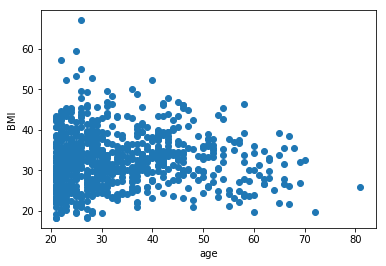

In [19]:
# 散布図を使用するのは2次元 (あるいは3次元) データ
# 今回はAgeとBMIの関係をプロットする

plt.scatter(data_age,data_BMI)
plt.xlabel('age')
plt.ylabel('BMI')

plt.show()

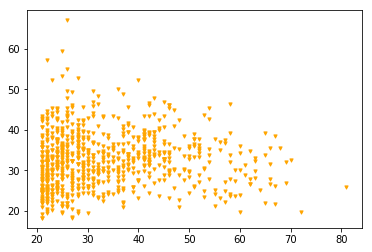

In [20]:
# ビジュアルの調整

plt.scatter(data_age,data_BMI,
            marker='v',          # マーカーの形の変更
            c='orange',          # マーカーの色の変更
            s=10                 # マーカーのサイズの変更
           )
plt.show()

In [21]:
# Outcome毎に分けてプロット
# あとで再利用するので、関数として定義しておきます

def plot_scatter(df_pos,df_neg,cols=['Age','BMI'],dsize=10):
    plt.scatter(df_pos[cols[0]],df_pos[cols[1]],
                c='orange',
                s=dsize,
                label='positive',
               )
    plt.scatter(df_neg[cols[0]],df_neg[cols[1]],
                c='blue',
                s=dsize,
                label='negative',
                alpha=0.3, # そのままだとドットが重なって見にくいため、透明度を調整
               )

    plt.xlabel(cols[0])
    plt.ylabel(cols[1])

    # legendを可視化
    plt.legend()

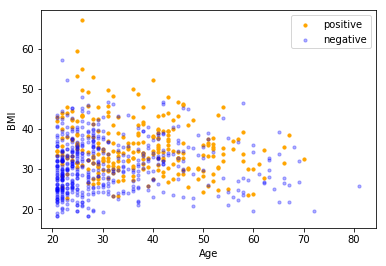

In [22]:
# プロット

plot_scatter(df_pos,df_neg)
plt.show()

## ヒートマップによる可視化

In [23]:
# 上で描いたscatter plotをヒートマップに変換

# ヒートマップを作成するためには、2次元平面をグリッド状に分割し、
# 各グリッドに対して「密度」などの何らかの値を定義する必要がある。
# ここでは、単純に各グリッドに含まれる人数をカウント

heatmap, xedges, yedges = np.histogram2d(data_age, data_BMI, bins=15)
# edgesは、データを15個のビンで切った際、切れ目部分に相当する数値を有している

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# 16個の切れ目のうち、最小値と最大値の情報を保存
# 後でheatmapを作成する際、各軸の範囲を指定するのに使用する

print(extent)

[21.0, 81.0, 18.2, 67.1]


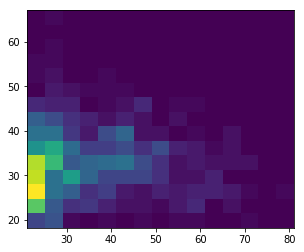

In [24]:
# matplotlibのimshow関数を使用

plt.imshow(heatmap.T,       # np.histogram2dのoutput行列を転置
           extent=extent,   # 軸の範囲を指定
           origin='lower',  # defaultは'upper'であり、そのままだとy軸が反転してしまう
          )
plt.show()

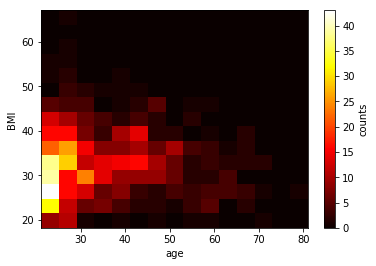

In [25]:
# ビジュアルの調整

plt.imshow(heatmap.T, 
           extent=extent, 
           origin='lower',
           cmap='hot'       # カラーマップの変更 (デフォルトは'viridis')
          )

plt.xlabel('age')
plt.ylabel('BMI')
cb = plt.colorbar() # カラーバーの追加
cb.set_label('counts') # カラーバーの数値にラベルを追加
plt.show()

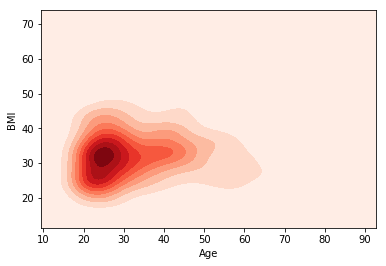

In [26]:
# seaborn.kdeplotによるdensity map
sns.kdeplot(data_age, data_BMI, shade=True, cmap='Reds')
plt.show()

## 折れ線グラフによる可視化

In [27]:
# Ageデータを使用
# まずは10歳ごとにデータを分割する
# pandasのcut functionを利用する

tmp = pd.cut(data_age,
              np.linspace(20,70,6) # 20歳から70歳までを10歳ごとに分割
             )
data_age_categorized = pd.concat([tmp,correct_df['Outcome']],axis=1)

# カテゴリデータに変換されていることの確認
data_age_categorized.head()

,Age,Outcome
0,"(40.0, 50.0]",1
1,"(30.0, 40.0]",0
2,"(30.0, 40.0]",1
3,"(20.0, 30.0]",0
4,"(30.0, 40.0]",1


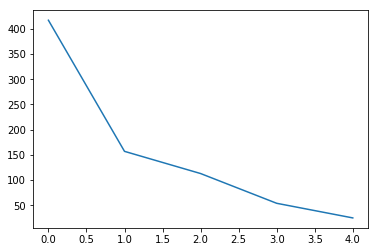

In [28]:
# 各カテゴリについて集計し、プロットのためリストに変換
age_count = list(data_age_categorized['Age'].value_counts())

plt.plot(age_count)
plt.show()

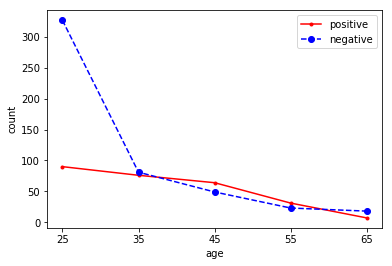

In [29]:
# Outcomeごとに分けてプロット

age_count_pos = data_age_categorized[data_age_categorized['Outcome']==1]
age_count_neg = data_age_categorized[data_age_categorized['Outcome']==0]

age_count_pos = list(age_count_pos['Age'].value_counts())
age_count_neg = list(age_count_neg['Age'].value_counts())

plt.plot(age_count_pos, '-r', marker='.')
plt.plot(age_count_neg, '--b', marker='o')
plt.xlabel('age')
plt.ylabel('count')
plt.legend(['positive','negative'])
plt.xticks([0,1,2,3,4],                # X軸ラベルの間隔を調整
           ['25','35','45','55','65'], # X軸ラベルを、各ビンの中心の値に設定
          )
plt.show()

## Logistic回帰とROC解析、ROC曲線

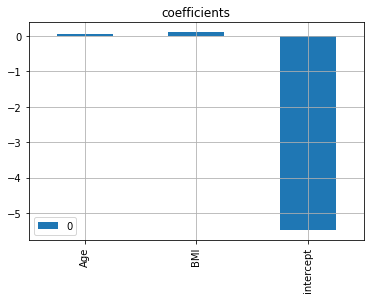

In [30]:
# まずLogistic regressionを行う
# e-learningの復習

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 説明変数の選択
X = correct_df[['Age','BMI']]
y = correct_df.loc[:, 'Outcome']

# 訓練データと評価データの分割
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=1/5, random_state=0
)

# インスタンスを生成します
lr = LogisticRegression(solver='lbfgs', class_weight='balanced',
                        max_iter=1e5, random_state=0)

# 学習（パラメータの推定）
# ここでは、理解を容易にするためデータを標準化せずに使用します
lr.fit(X_train, y_train)

# DataFrameに格納
coefs = pd.DataFrame(lr.coef_, columns=X.columns)
coefs['intercept'] = lr.intercept_

# DataFrameの可視化
coefs.T.plot(y=coefs.index, kind='bar', title='coefficients', grid=True)

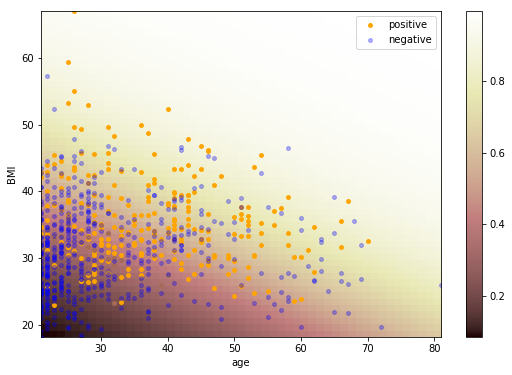

In [31]:
# Logistic regressionの結果を可視化します

age = np.linspace(np.min(data_age),np.max(data_age),51)
BMI = np.linspace(np.min(data_BMI),np.max(data_BMI),51)

# age x BMI の２次元平面の各座標において、regressionで求めた関数から陽性率を計算します
prediction = np.zeros([51,51])
for i in range(51):
    for j in range(51):
        prediction[i,j] = lr.predict_proba([[age[i],BMI[j]]])[0,1]

# 以下、陽性率の関数とデータの散布図を同一グラフ上に描画
extent = [np.min(data_age), np.max(data_age), np.min(data_BMI), np.max(data_BMI)]

fig = plt.figure(figsize=[9,6])
ax = fig.add_subplot(1,1,1)

plot_scatter(df_pos,df_neg,dsize=15)

im = ax.imshow(prediction.T,
               extent=extent,
               origin='lower',
               cmap='pink'
              )
ax.set_xlabel('age')
ax.set_ylabel('BMI')
fig.colorbar(im)
plt.show()

              precision    recall  f1-score   support

           1       0.47      0.57      0.51        47
           0       0.79      0.71      0.75       107

   micro avg       0.67      0.67      0.67       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.69      0.67      0.68       154



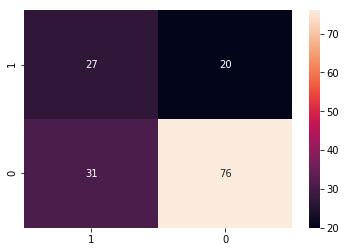

In [32]:
# 混合行列、classification_reportの確認
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

y_pred = lr.predict(X_test)
labels = [1,0]
print(classification_report(y_test, y_pred, labels=labels))

# 混合行列を出力します
# 医療検査で1を陽性、0を陰性とすると、左上は真陽性(true positive)、右下は真陰性(true negative)、
# 右上は偽陽性(false positive)、左下は偽陰性(false negative)になります。
conf_mtx = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(conf_mtx, annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

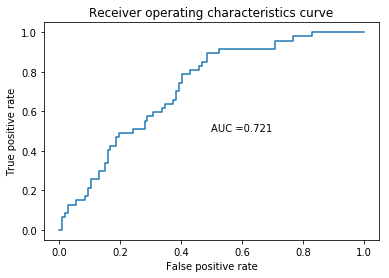

In [33]:
# ROC curve, およびarea under the curve (AUC) の計算

# ROC curveの計算は、上の図で示したdecision surface (閾値) を両方向に平行移動させていったときに
# 真陽性率と偽陽性率がどのように変化していくかを調べることに相当します
# テストデータを使用してROC curveを計算するために、まずはテストデータの
# 各点における陽性率を、LogisticRegression.predict_proba関数を使用して計算します
prob_positive = lr.predict_proba(X_test)[:,1]

# 次に、上で求めた真陽性率と、各点の真のOutcomeの値を使用して、
# 様々なthresholdsにおける真陽性率と偽陽性率を計算します
fpr, tpr, thresholds = roc_curve(y_test, prob_positive)

# ROC curveのarea under the curveを計算
roc_auc = auc(fpr, tpr)
s = 'AUC =' + str(np.round(roc_auc,3)) # 値を四捨五入し、文字列に変換しておく

# 実際にROC curveを描いてみます
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics curve')
plt.text(0.5,0.5,s) # plotの中にAUCを書きます。最初の二つの数字はテキストの開始位置を示しています
plt.show()

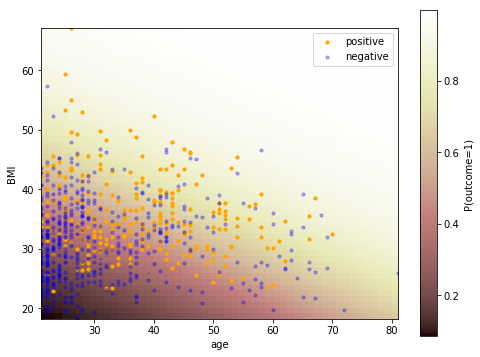

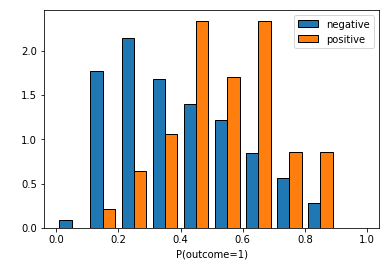

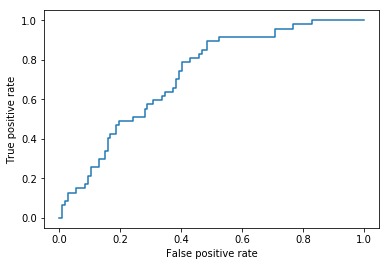

In [35]:
# おまけ
# ROC curveの簡単な解説

tmp = [[y_test.iloc[i],prob_positive[i]] for i in range(y_test.shape[0])]
prob_pos = [v[1] for v in tmp if v[0]==1]
prob_neg = [v[1] for v in tmp if v[0]==0]

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(1,1,1)
plot_scatter(df_pos,df_neg,dsize=10)
im = ax.imshow(prediction.T,
               extent=extent,
               origin='lower',
               cmap='pink'
               )
ax.set_xlabel('age')
ax.set_ylabel('BMI')
cb = fig.colorbar(im)
cb.set_label('P(outcome=1)')

plt.figure(figsize=[6,4])
bins = np.linspace(0,1,11)
plt.hist([prob_neg,prob_pos], bins=bins, density=True, edgecolor='black')
plt.xlabel('P(outcome=1)')
plt.ylabel(' ')
plt.legend(['negative','positive'])

plt.figure(figsize=[6,4])
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.show()

# データ可視化練習

##### 上では説明変数としてageおよびBMIを使用し、AUC=0.72という値を得ました。
##### しかし、これらは説明変数のペアとしては必ずしもベストの選択肢ではありません。
##### そこで、「何かしらの根拠」でもってより良い説明変数のペアを見つけ出し、
##### そのペアでロジスティック回帰後のAUCを計算してみてください。
##### 良い説明変数を探し出す際の根拠は、上で学習したデータ可視化手法のいずれかを
##### 使用したプロットとしてください。

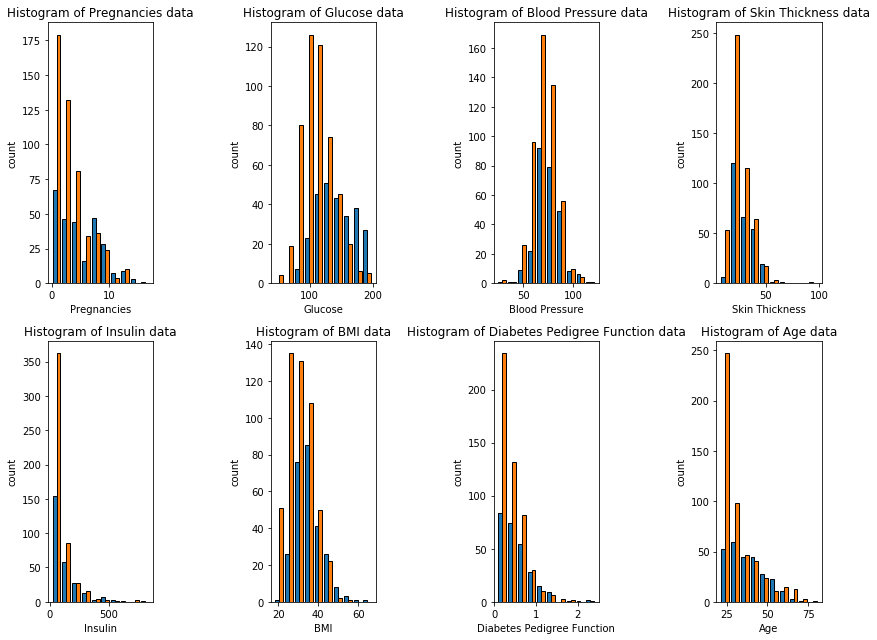

In [38]:
fig, axes = plt.subplots(2,4,figsize=[12,9])
col_list = correct_df.columns.values[:8]
k=0
for i in range(2):
    for j in range(4):
        plot_histogram(axes[i,j],df_pos,df_neg,
                       col=col_list[k],
                       ti=True
                      )
        k=k+1
        
plt.tight_layout()
plt.show()

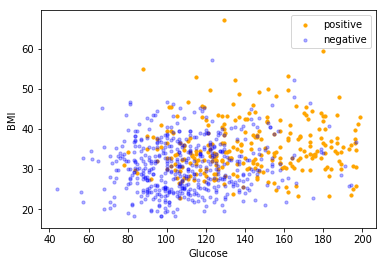

In [39]:
cols = ['Glucose','BMI']
plot_scatter(df_pos,df_neg,cols=cols)

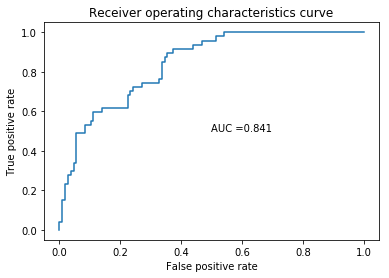

In [40]:
X = correct_df[cols]
y = correct_df.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=1/5, random_state=0
)
lr = LogisticRegression(solver='lbfgs', class_weight='balanced',
                        max_iter=1e5, random_state=0)
lr.fit(X_train, y_train)

prob_positive = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob_positive)
roc_auc = auc(fpr, tpr)
s = 'AUC =' + str(np.round(roc_auc,3))

# ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics curve')
plt.text(0.5,0.5,s)
plt.show()